# Pattern Recognition and Machine Learning
## Programming Assignment 2
### By Saurav Kumar (SC16B108)

1). **Data Visualization and Preprocessing**
<br><br>
(a) **Data reading and Visualisation**<br>
Read the Iris Dataset given in the Resources folder. Choose any two features and
visualize using matplotlib. <br><br>
(b) **Decorrelation**<br>
Decorrelate the data and visualize.<br><br>
(c) **Whitening transform**<br>
Apply the whitening transform on the data and visualize.<br><br>
(d) **Classification**<br>
Divide the dataset into training and testing dataset (70 % for training and 30 %
for testing). Design a Naive Bayes Classifier. Calculate the testing accuracy.

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import norm, multivariate_normal, beta, binom
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture

In [2]:
df = pd.read_excel('irisdata.xls', header=None)

In [3]:
Encoder = LabelEncoder()

In [4]:
Y = Encoder.fit_transform(df.iloc[:,4])

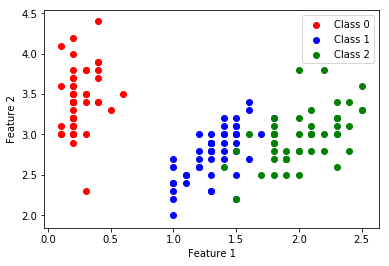

In [5]:
plt.scatter(df.iloc[:50,3], df.iloc[:50,1],c='red')
plt.scatter(df.iloc[50:100,3],df.iloc[50:100,1],c='blue')
plt.scatter(df.iloc[100:150,3], df.iloc[100:150,1], c='green')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(['Class 0', 'Class 1', 'Class 2'])

## Decorrelation

In [6]:
zero_mean_X = stats.zscore(df.iloc[:,:2])
covarience = np.cov(zero_mean_X.T)
eigenValues, eigenVectors = np.linalg.eig(covarience)
decorrelated = np.matmul(zero_mean_X, eigenVectors)
np.cov(decorrelated.T)

array([[ 1.12507025e+00, -1.01373953e-15],
       [-1.01373953e-15,  8.88352566e-01]])

#### The covarience of decorrelated data is a DIAGONAL matrix as obtained above

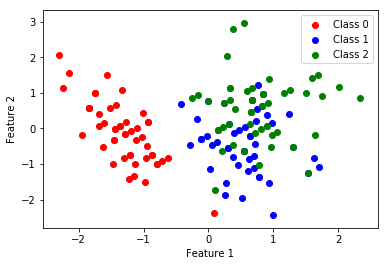

In [7]:
plt.scatter(decorrelated[:50,0], decorrelated[:50,1],c='red')
plt.scatter(decorrelated[50:100,0],decorrelated[50:100,1],c='blue')
plt.scatter(decorrelated[100:150,0], decorrelated[100:150,1], c='green')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(['Class 0', 'Class 1', 'Class 2'])

## Whitening
We've added a small value (here $10^{-5}$) to avoid the division by 0

In [8]:
whitened_data = decorrelated/np.sqrt(eigenValues+1e-5)
np.cov(whitened_data.T)

array([[ 9.99991112e-01, -1.02022615e-15],
       [-1.02022615e-15,  9.99988743e-01]])

#### The covarience of Whitened data is an IDENTITY matrix as obtained above

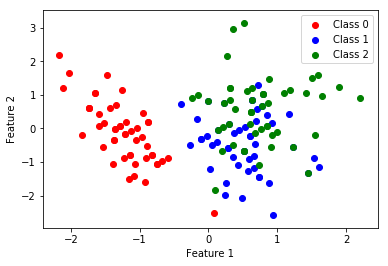

In [9]:
plt.scatter(whitened_data[:50,0], whitened_data[:50,1],c='red')
plt.scatter(whitened_data[50:100,0],whitened_data[50:100,1],c='blue')
plt.scatter(whitened_data[100:150,0], whitened_data[100:150,1], c='green')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(['Class 0', 'Class 1', 'Class 2'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:4], Y, test_size=0.3, random_state=1)

#### Classes are equiprobable, so prior probabilities are same for all


In [11]:
Prior_prob = [1/3, 1/3, 1/3]

In [12]:
X_class_0 = X_train.loc[y_train == 0]
X_class_1 = X_train.loc[y_train == 1]
X_class_2 = X_train.loc[y_train == 2]

mean_class_0 = X_class_0.mean()
sigma_class_0 = X_class_0.std()

mean_class_1 = X_class_1.mean()
sigma_class_1 = X_class_1.std()

mean_class_2 = X_class_2.mean()
sigma_class_2 = X_class_2.std()

In [13]:
def classify_using_naive_bayes(X):
    likelihood = np.zeros((len(X[0]),3))
    likelihood[:,0] = norm(mean_class_0[0],sigma_class_0[0]).pdf(X[0])*norm(mean_class_0[1], sigma_class_0[1]).pdf(X[1])*norm(mean_class_0[2], sigma_class_0[2]).pdf(X[2])
    likelihood[:,1] = norm(mean_class_1[0],sigma_class_1[0]).pdf(X[0])*norm(mean_class_1[1], sigma_class_1[1]).pdf(X[1])*norm(mean_class_1[2], sigma_class_1[2]).pdf(X[2])
    likelihood[:,2] = norm(mean_class_2[0],sigma_class_2[0]).pdf(X[0])*norm(mean_class_2[1], sigma_class_2[1]).pdf(X[1])*norm(mean_class_2[2], sigma_class_2[2]).pdf(X[2])
    Posterior = Prior_prob*likelihood
    pred = np.argmax(Posterior,axis=1)
    return pred

In [14]:
y_pred = classify_using_naive_bayes(X_train)

In [15]:
training_accuracy = np.mean(y_pred==y_train)

#### Training Accuracy = {{ training_accuracy*100 }} %

In [16]:
Y_pred = classify_using_naive_bayes(X_test)

In [17]:
test_accuracy = np.mean(Y_pred==y_test)

#### Test Accuracy = {{ test_accuracy*100 }} %

2. **Maximum Likelihood Estimation** <br>
Read the Iris Dataset given in the Resources
folder. Divide your selected data set into Training set (70%) and test set (30%) <br><br>
(a) Formulate likelihoods of each class by fitting Multivariate Gaussian distribution to
each class (training) data, whose means and Co-variances are computed by Maximum likelihood estimation (i.e., by Sample means and Sample co-variances in higher
dimensions). <br><br>
(b) Using these (multivariate) likelihoods and priors (case 1: equiprobable, case 2:
[0.3,0.5,0.2] ) apply bayesian decision theory to classify each test sample and quan-
tify the accuracy (by comparing with true label). <br><br>
(c) Try with different size for training dataset (1. 30%, 2. 50% 3.70%). Comment on
the accuracy of ML estimation.

In [18]:
likelihood = np.zeros((len(X_train[0]),3))
likelihood[:,0] = multivariate_normal.pdf(X_train,mean = mean_class_0, cov = X_class_0.cov())
likelihood[:,1] = multivariate_normal.pdf(X_train,mean = mean_class_1, cov = X_class_1.cov())
likelihood[:,2] = multivariate_normal.pdf(X_train,mean = mean_class_2, cov = X_class_2.cov())

In [19]:
def classify_using_bayes(X_test):
    likelihood = np.zeros((len(X_test[0]),3))
    likelihood[:,0] = multivariate_normal.pdf(X_test,mean = mean_class_0, cov = X_class_0.cov())
    likelihood[:,1] = multivariate_normal.pdf(X_test,mean = mean_class_1, cov = X_class_1.cov())
    likelihood[:,2] = multivariate_normal.pdf(X_test,mean = mean_class_2, cov = X_class_2.cov())
    Posterior = Prior_prob*likelihood
    y_pred = np.argmax(Posterior, axis=1)
    return y_pred

### Case 1: Equiprobable

In [20]:
Prior_prob = [1/3, 1/3, 1/3]

In [21]:
y_pred = classify_using_bayes(X_test)

In [22]:
test_accuracy = np.mean(y_pred==y_test)

#### Test accuracy = {{test_accuracy*100}} %

### Case 2: Different prior

In [23]:
Prior_prob = [0.3, 0.5, 0.2]

In [24]:
y_pred = classify_using_bayes(X_test)

In [25]:
test_accuracy = np.mean(y_pred==y_test)

#### Test accuracy = {{test_accuracy*100}} %

### Training Set = 50%

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:4], Y, test_size=0.5, random_state=1)
X_class_0 = X_train.loc[y_train == 0]
X_class_1 = X_train.loc[y_train == 1]
X_class_2 = X_train.loc[y_train == 2]
mean_class_0 = X_class_0.mean()
mean_class_1 = X_class_1.mean()
mean_class_2 = X_class_2.mean()
Prior_prob = [1/3, 1/3,1/3]
y_pred = classify_using_bayes(X_test)
test_accuracy = np.mean(y_pred==y_test)
print(test_accuracy*100)

100.0


### Training Set = 30%

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:4], Y, test_size=0.7, random_state=1)
X_class_0 = X_train.loc[y_train == 0]
X_class_1 = X_train.loc[y_train == 1]
X_class_2 = X_train.loc[y_train == 2]
mean_class_0 = X_class_0.mean()
mean_class_1 = X_class_1.mean()
mean_class_2 = X_class_2.mean()
Prior_prob = [1/3, 1/3,1/3]
y_pred = classify_using_bayes(X_test)
test_accuracy = np.mean(y_pred==y_test)
print(test_accuracy*100)

91.42857142857143


#### The accuracy of ML estimate is 100% until model is training and test set size is 50%. When test size increases more than training set, accuracy starts to decrease from 100%

3. **Probability Distributions** <br>
Plot the following distributions by taking 10000 samples. Find the mean and variance
also. <br><br>
1) Beta Distribution Beta($\mu$|a, b)<br>
(a) a = b = 0.1<br>
(b) a = b = 1<br>
(c) a = 2, b = 3<br>
(d) a = 8, b = 4<br>
2) Binomial Distribution Binom(n, p). Take 10000 samples for plotting.<br>
(a) p = 0.5, n = 50 <br>
(b) p = 0.5, n = 100 <br>
(c) p = 0.7, n = 50 <br>

Mean is  0.9339297678636526
Variance is  527.4656365041318


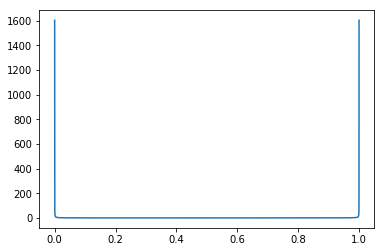

In [41]:
a=0.1
b=0.1
X = np.linspace(0+1e-5,1-1e-5,10000) #beta dist is only defined for x = [0,1]
rv = beta(a,b)
plt.plot(X,rv.pdf(X))
print("Mean is ", np.mean(rv.pdf(X)))
print("Variance is ", np.var(rv.pdf(X)))

Mean is  1.0
Variance is  0.0


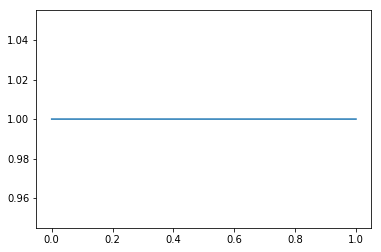

In [42]:
a=1
b=1
X = np.linspace(0,1,10000)
rv = beta(a,b)
plt.plot(X,rv.pdf(X))
print("Mean is ", np.mean(rv.pdf(X)))
print("Variance is ", np.var(rv.pdf(X)))

Mean is  0.9998999899990002
Variance is  0.3714914385714281


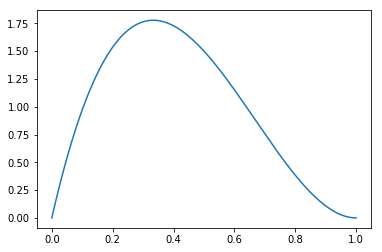

In [43]:
a=2
b=3
X = np.linspace(0,1,10000)
rv = beta(a,b)
plt.plot(X,rv.pdf(X))
print("Mean is ", np.mean(rv.pdf(X)))
print("Variance is ", np.var(rv.pdf(X)))

Mean is  0.9999000000000011
Variance is  1.1406316574038013


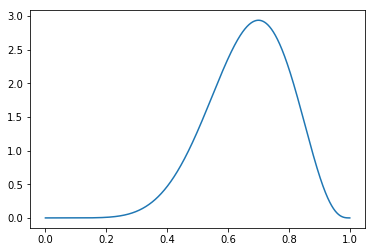

In [45]:
a=8
b=4
X = np.linspace(0,1,10000)
rv = beta(a,b)
plt.plot(X,rv.pdf(X))
print("Mean is ", np.mean(rv.pdf(X)))
print("Variance is ", np.var(rv.pdf(X)))

Mean is  9.999999999999935e-05
Variance is  7.948923738717766e-06


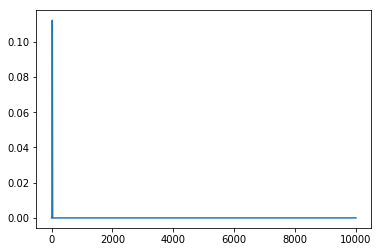

In [46]:
n = 50
p = 0.5
X = np.arange(0,10000)
y = binom.pmf(X,n,p)
plt.plot(X,y)
print("Mean is ", np.mean(y))
print("Variance is ", np.var(y))

Mean is  9.99999999999971e-05
Variance is  5.624847900925335e-06


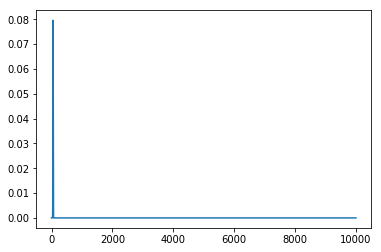

In [48]:
n=100
p=0.5
X = np.arange(10000)
y = binom.pmf(X,n,p)
plt.plot(X,y)
print("Mean is ", np.mean(y))
print("Variance is ", np.var(y))

Mean is  9.999999999999945e-05
Variance is  8.682288874122237e-06


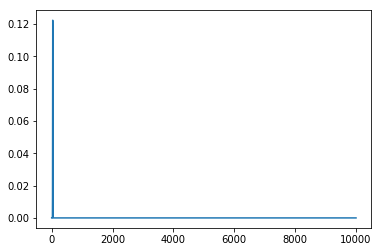

In [49]:
n=50
p=0.7
X = np.arange(10000)
y = binom.pmf(X,n,p)
plt.plot(X,y)
print("Mean is ", np.mean(y))
print("Variance is ", np.var(y))

4. **Conjugate Priors and Bayesian Inference**<br><br>
(A) **Beta prior and Binomial Likelihood:** <br>
Consider a prior distribution Beta(2, 2) and a Binomial likelihood function with <br>
a) n = 5, k = 4<br>
b) n = k = 1 <br>
Plot the posterior for both the cases<br><br>
(B) **Gaussian prior and Gaussian Likelihood :**<br>
Sample 100 data points from the distribution N (0.8, 0.1). Assume that the mean is unknown and the variance is known to be 0.1. Let the prior distribution for the mean be N (0, 1).<br>
a) Plot the posterior distribution for the mean using Bayesian inference.<br>
b) How does the distribution change when 1000 data points are considered?<br>
c) Describe the changes to the pdf for mean, in updating from the prior to the posterior.

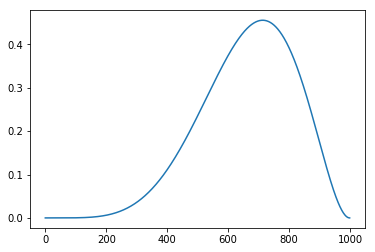

In [35]:
X = np.linspace(0,1,1000)
prior = beta.pdf(X,2,2)
k=4
n=5
likelihood = binom.pmf(k,n,X)
posterior = prior*likelihood
plt.plot(posterior)

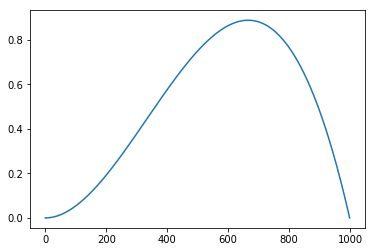

In [36]:
k=1
n=1
likelihood = binom.pmf(k,n,X)
posterior = prior*likelihood
plt.plot(posterior)

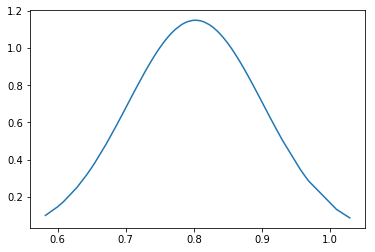

In [97]:
points = np.random.normal(0.8,0.1,100)
prior = norm.pdf(points,0,1)
likelihood = norm.pdf(points,points.mean(),0.1)
posterior = prior*likelihood
order = np.argsort(points)
X = np.array(points)[order]
Y = np.array(posterior)[order]
plt.plot(X,Y)

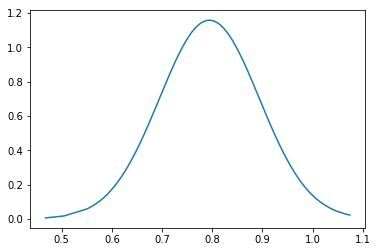

In [98]:
points = np.random.normal(0.8,0.1,1000)
prior = norm.pdf(points,0,1)
likelihood = norm.pdf(points,points.mean(),0.1)
posterior = prior*likelihood
order = np.argsort(points)
X = np.array(points)[order]
Y = np.array(posterior)[order]
plt.plot(X,Y)

When sample points are changed from 100 to 1000, the variance has decreased

In [99]:
print("Posterior Mean is ",posterior.mean())
print("Posterior Varience is ", posterior.var())

Posterior Mean is  0.8209643081076936
Posterior Varience is  0.09981464207529779


**Prior pdf** ~ $N(0,1)$<br>
**Posterior pdf** ~$N(0.82,0.1)$

5. **GMM and Expectation Maximization Algorithm:**<br>
Consider three Gaussian pdfs, N (1, 0.1), N (3, 0.1), N (2, 0.2). Generate 500 samples according to the following rule: The first two samples are generated from the second Gaussian, the third sample from the first one, and the fourth sample from the last Gaussian. This rule repeats until all 500 samples are generated. The pdf underlying the
random samples is modeled as a mixture <br>
$\sum_\limits{i=1}^{3}N(\mu, \sigma_i^2)P_i$ <br>
Use the EM algorithm and the generated sampled to estimate the unknown parameters $\mu_i, \sigma_i^2, P_i$

In [125]:
X =[]
for i in range(500):
    if i%4==0 or i%4==1:
        value = np.random.normal(1,0.1,1)
        X = np.append(X,value)
    elif i%4==2:
        value = np.random.normal(3,0.1,1)
        X = np.append(X,value)
    else:
        value = np.random.normal(2,0.2,1)
        X = np.append(X,value)

In [126]:
gmm = GaussianMixture(n_components=3)

In [127]:
gmm = gmm.fit(X.reshape(-1,1))

In [132]:
means = gmm.means_

In [133]:
variences = gmm.covariances_

In [134]:
weights = A.weights_

#### Estimated parameters

$\mu_1 = 1.00741711$, $\mu_2 = 2.9956155$, $\mu_3 = 1.97131564$

$\sigma_1^2 = 0.00866927$, $\sigma_2^2 = 0.01020714$, $\sigma_3^2 = 0.0362771$

$P_1 = 0.41883245$, $P_2 = 0.33002292$, $P_3 = 0.25114463$